<a href="https://colab.research.google.com/github/MedAziz218/ColorPicker/blob/main/interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Header
import numpy as np
import numpy.linalg as alg
from matplotlib import pyplot as plt



[8.9958057  8.96239187 8.89631062 8.79903811 8.67274722 8.52025911
 8.34498009 8.15082561 7.94213276 7.7235634  7.5        7.2764366
 7.05786724 6.84917439 6.65501991 6.47974089 6.32725278 6.20096189
 6.10368938 6.03760813]


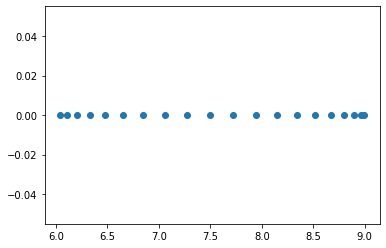

In [98]:
def equidistant_points(a,b,n):
    assert a < b
    return np.linspace(a,b,n)
def tchebychev_points(a,b,n):
    assert a < b
    l = []
    for k in range(n):
        xk = np.cos((2*k+1)*np.pi/(2*(n+1)))
        l.append(xk)
    return ((np.array(l)+1)/2)*(b-a)+a
# xs = tchebychev_points(6,9,20)
# print(xs)
# plt.scatter(xs,np.zeros(xs.size))


<ipython-input-144-c88f7d8ea5be>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
<ipython-input-144-c88f7d8ea5be>:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


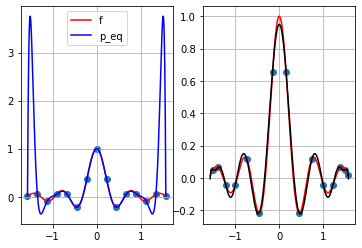

In [144]:
## methode directe


def methode_directe(f, xs:np.array):
    ys = f(xs)
    van = np.vander(xs,n)
    sol = alg.solve(van,ys)
    sol = sol[::-1] # polynome coefficents

    def p(x):
        return sum([(x**i)*sol[i] for i in range(n)])
    p = np.vectorize(p)
    return p
pi = np.pi
a,b = -pi/2,pi/2
n = 15
f = lambda x: np.sinc(x*np.pi)

# plotting the graph

for i in range(1,3):
    plt.subplot(1,2,i)
    fxs = np.linspace(a,b,500)
    plt.plot(fxs,f(fxs),label = 'f',c='r')



plt.subplot(1,2,1)
xs = equidistant_points(a,b,n)
p_eq = methode_directe(f,xs)
plt.plot(fxs,p_eq(fxs),label = 'p_eq',c='b')
plt.scatter(xs,f(xs))
plt.legend();plt.grid();


plt.subplot(1,2,2)
xs = tchebychev_points(a,b,n)
p_tcheby =  methode_directe(f,xs)
plt.plot(fxs,p_tcheby(fxs),label = 'p_tcheby',c='black')
plt.scatter(xs,f(xs))
plt.grid();




plt.show()


In [68]:
## methode de Lagrange

